<a href="https://colab.research.google.com/github/Thealansan/Examen1/blob/main/consumer_mit_lift_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos las librerias que necesitamos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar aechivos csv desde equipo 
from google.colab import files 
files.upload()

In [ ]:
#Carga desde un archivo .xlsx sin indice
data= pd.read_excel('consumer_mit_lift_lab.xlsx')
data

In [ ]:
#Identificar valores nulos por columna
valores_nulos=data.isnull().sum() 
valores_nulos

**Aplicamos los métodos de sustitución para sacar nulos**

In [ ]:
#Hago una copia del data que ya tenemos 
data1=data.copy()
data1

In [ ]:
#Sustituir valores nulos por un string en concreto
data1["300_did_not_find"]=data1["300_did_not_find"].fillna("Si encontro lo que buscaba")  

In [ ]:
#Corroboramos valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos

In [ ]:
#Sustituir valores nulos por valore no nulos hacia adelante "forward fill" ("bfill")
#Filtro por columnas
data1["storefront_picture_just_once_if_possible"]=data1["storefront_picture_just_once_if_possible"].fillna(method="bfill")

In [ ]:
#Corroboramos valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos

In [ ]:
#Sustituir valores nulos por valore no nulos hacia adelante "forward fill" ("ffill")
#Filtro por columnas
data1["304_additional_services_store"]=data1["304_additional_services_store"].fillna(method="ffill")

In [ ]:
#Corroboramos valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos

In [ ]:
#Sustituir valores nulos por valore no nulos hacia adelante "forward fill" ("bfill")
#Filtro por columnas
data1["308_topups_in_store"]=data1["308_topups_in_store"].fillna(method="bfill")

In [ ]:
#Corroboramos valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos

In [ ]:
#Sustituir valores nulos por valore no nulos hacia adelante "forward fill" ("ffill")
#Filtro por columnas
data1["284_additional_products_store"]=data1["284_additional_products_store"].fillna(method="ffill")

In [ ]:
#Corroboramos valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos

In [ ]:
#Sustituir valores nulos por valore no nulos hacia adelante "forward fill" ("ffill")
#Filtro por columnas
data1["305_electricity_bill_store"]=data1["305_electricity_bill_store"].fillna(method="ffill")

In [ ]:
#Corroboramos valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos

In [ ]:
#Sustituir valores nulos por valore no nulos hacia adelante "forward fill" ("ffill")
#Filtro por columnas
data1["306_water_bill_store"]=data1["306_water_bill_store"].fillna(method="ffill")

In [ ]:
#Corroboramos valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos

In [ ]:
#Sustituir valores nulos por valore no nulos hacia adelante "forward fill" ("ffill")
#Filtro por columnas
data1["307_gas_bill_store"]=data1["307_gas_bill_store"].fillna(method="ffill")

In [ ]:
#Corroboramos valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos

In [ ]:
#Sustituir valores nulos por un valo númerico en concreto 
data1["309_wiretransfers_in_store"]=data1["309_wiretransfers_in_store"].fillna(10)

In [ ]:
#Corroboramos valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos

**Eliminar Outliers**

<Figure size 1080x576 with 0 Axes>

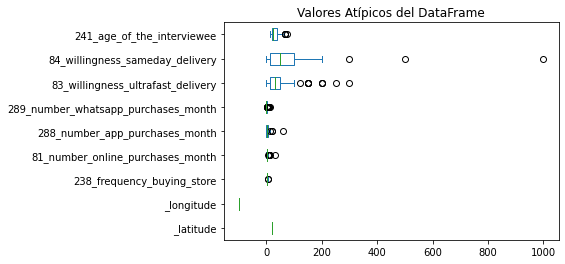

In [ ]:
#Realizamos diagrama de caja de cada columna del df
fig = plt.figure(figsize=(15,8))
data1.plot(kind='box', vert=False)
plt.title("Valores Atípicos del DataFrame")
plt.show() # dibujamos el diagrama

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   _record_id                                115 non-null    object 
 1   _title                                    115 non-null    object 
 2   _server_updated_at                        115 non-null    object 
 3   _updated_by                               115 non-null    object 
 4   _geometry                                 115 non-null    object 
 5   _latitude                                 115 non-null    float64
 6   _longitude                                115 non-null    float64
 7   282_payment_method_that_purchase          115 non-null    object 
 8   283_fulfill_needs                         115 non-null    object 
 9   300_did_not_find                          115 non-null    object 
 10  237_distance_household_interviewee    

In [ ]:
#Filtro por columnas
data2=data1.iloc[: ,[12,26,27,28,29,30,31]]
data2

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data2

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q2
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 + 1.5*iqr
print("Límite superior permitido", Limite_Superior_iqr)
print("Límite inferior permitido", Limite_Inferior_iqr)

In [ ]:
#Encontramos Outliers del DataFrame
outlier_iqr= data2[(y>Limite_Superior_iqr)&(y<Limite_Inferior_iqr)]
outlier_iqr

In [ ]:
#Obtenemos datos limpios del DataFrame
data3_iqr= data2[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data4_iqr.mean(),1))
data4_iqr

In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data4_iqr.isnull().sum()
valores_nulos

In [ ]:
#Filtro por columnas para obtener las columnas con datos que nos importan 
data5=data1.iloc[: ,[0,1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,32,33,34,35]]
data5

In [ ]:
#Unimos las columnas sin outliers con las de los datos cualitativos 
consumer_mit_laft_lab_LIMPIO = pd.concat([data5,data4_iqr], axis=1)
consumer_mit_laft_lab_LIMPIO

In [ ]:
#Convertir df a csv
data.to_csv("consumer_mit_lift_lab.csv")

In [ ]:
#Descargar archivo filtrado en csv 
from google.colab import files
files.download("consumer_mit_lift_lab.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>